In [1]:
import yaml
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
def read_query_results(filename):
    with open(filename, 'r') as f:
        query_results = yaml.load(f, Loader=yaml.FullLoader)
    return query_results

In [3]:
query_results=read_query_results("./results/ocr_results") 
page_quality={}
words_in_dictionary={}
for key,values in query_results.items():
    if key not in page_quality:
        page_quality[key]=[]
        words_in_dictionary[key]=[]
    for v in values:
        page_quality[key].append(v[0])
        rescaling=str(float(v[1])/100)
        words_in_dictionary[key].append(rescaling)

In [4]:
print(page_quality[1757][0], words_in_dictionary[1757][0])

0.751 0.68


In [5]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def barplot(x_data, y_data, error_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

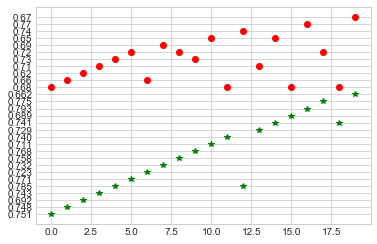

In [6]:
plt.plot(page_quality[1757][0:20],'g*', words_in_dictionary[1757][0:20],'ro') 
plt.show()


In [7]:
cleaned_results = {year: list(filter(lambda x: x[0] is not None, zip(pq, words_in_dictionary[year]))) for year, pq in page_quality.items()}

In [8]:
cleaned_page_quality = {year: np.array([float(x[0]) for x in cr]) for year, cr in cleaned_results.items()}
cleaned_words_in_dict = {year: np.array([float(x[1]) for x in cr]) for year, cr in cleaned_results.items()}

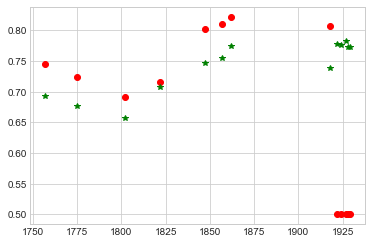

In [9]:
avg_page_quality = [np.average(v) for k,v in cleaned_page_quality.items()]
avg_words_in_dict = [np.average(v) for k,v in cleaned_words_in_dict.items()]
plt.plot(cleaned_page_quality.keys(),avg_page_quality, 'ro', cleaned_words_in_dict.keys(),avg_words_in_dict, 'g*')

In [10]:
std_page_quality = [np.std(v) for k,v in cleaned_page_quality.items()]
std_words_in_dict = [np.std(v) for k,v in cleaned_words_in_dict.items()]

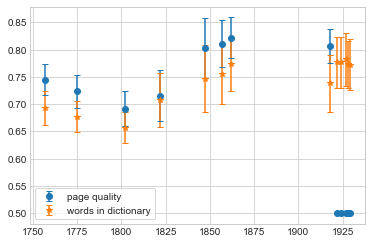

In [11]:
plt.errorbar(cleaned_page_quality.keys(),
             avg_page_quality, 
             std_page_quality, 
             label='page quality',
             linestyle='None', marker='o', capsize=3)
plt.errorbar(cleaned_words_in_dict.keys(),
             avg_words_in_dict, 
             std_words_in_dict, 
             label='words in dictionary',
             linestyle='None', marker='*', capsize=3)
plt.legend(frameon=True, loc=3)
plt.show()